#### **Beginner**

Random Numbers (1 x n): [7, 18, 91, 58, 19, 14]
Random Numbers (n x n):
[7, 18, 91, 58, 19, 14]
[47, 62, 63, 50, 19, 50]
[87, 6, 19, 58, 35, 70]
[43, 66, 91, 66, 51, 90]
[83, 10, 63, 74, 51, 10]
[23, 70, 35, 66, 67, 30]


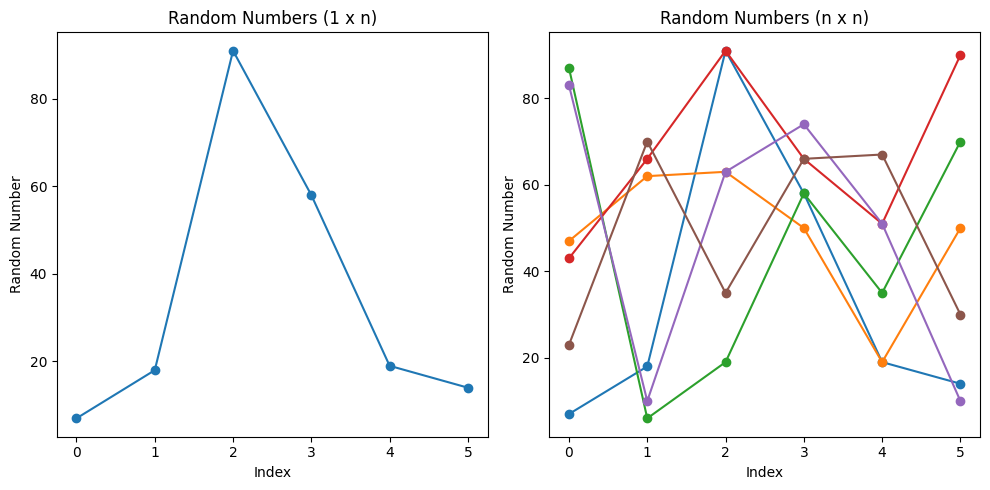

In [3]:
# Question 1: Make a random number generator which takes input as size and generate random numbers.
# Using this generate and plot random numbers of size:
# (a) 1×np
# (b) n×n

# Answer: 
import matplotlib.pyplot as plt
import time

# Random function to generates random numbewr under 0-50.
# Here I am going to use Linear Congruential Generator equation: NextNumber = (ran x currentNumber + inc) % mod
class RandomNumberGenerator:
    def __init__(self, seed=int(time.time())):
        self.ran = 1644555
        self.mod = 2**24
        self.inc = 1664525
        self.seed = seed

    def liConGen(self, seed, size):  # Generates random numbers using defined equation.
        randList = []
        cur = seed
        for i in range(size):
            cur = (cur * self.ran + self.inc) % self.mod
            randList.append(cur % 100)  # Random numbers in range [0, 50)
        return randList

    def ranNumGen_1xN(self, n):
        return self.liConGen(self.seed, n)

    def ranNumGen_NxN(self, n):
        return [self.liConGen(self.seed + i * 100, n) for i in range(n)]

ranGen = RandomNumberGenerator()
rand_1xN = ranGen.ranNumGen_1xN(6)
rand_NxN = ranGen.ranNumGen_NxN(6)

print("Random Numbers (1 x n):", rand_1xN)
print("Random Numbers (n x n):")
for row in rand_NxN:
    print(row)

# Plotting the random numbers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(rand_1xN, marker='o')
plt.title('Random Numbers (1 x n)')
plt.xlabel('Index')
plt.ylabel('Random Number')

plt.subplot(1, 2, 2)
for row in rand_NxN:
    plt.plot(row, marker='o')
plt.title('Random Numbers (n x n)')
plt.xlabel('Index')
plt.ylabel('Random Number')

plt.tight_layout()
plt.show()


In [4]:
# Question 2: Using above implemented random number generator select 12 samples from the EEG data and print there metadata.

# Answer:
import os
import glob

def countFiles(directory, basename):
    matches = os.path.join(directory, basename)
    return len(glob.glob(matches))

def getFilesCount(imgAuPath):
    return sum(os.path.isfile(os.path.join(imgAuPath, f)) for f in os.listdir(imgAuPath))

def selectRandSample_fetchMetaData(csvPath, imgAuPath, sampleSize):
    n = 1
    metadata = {}
    tltFiles = getFilesCount(imgAuPath)
    
    rnad = RandomNumberGenerator()
    rnadIndices = rnad.liConGen(rnad.seed, sampleSize)
    rnadIndices = [index % tltFiles for index in rnadIndices]
    print(rnadIndices)

    chosenFolds = []
    listFiles = [files for files in os.listdir(imgAuPath) if os.path.isfile(os.path.join(imgAuPath, files))]
    print(listFiles)
    
    for idx in rnadIndices:
        count = 0
        for files in listFiles:
            if count == idx:
                chosenFolds.append(files)
                break
            count += 1


    for i, files in enumerate(chosenFolds, start=1):
        basename, ext = os.path.splitext(os.path.basename(files))
        imgAuPathFull = os.path.join(imgAuPath, files)
        fileSize = os.path.getsize(imgAuPathFull)
        metadata[files] = {
            "ID": n,
            "Basename": files,
            "Size": fileSize,
            "Number of Images": len(os.listdir(os.path.join(imgAuPath, basename))),
            "Number of Csv(EEG)": countFiles(csvPath, f"*{basename}*")
        }
        n+=1
        
    return metadata


imgAuPath = 'Datasets\\MLA1_DATA\\ImageAudio'
csvPath = 'Datasets\\MLA1_DATA\\CSV'

sampleSize = 12
selectRandSample_fetchMetaData(csvPath, imgAuPath, sampleSize)


[7, 18, 91, 58, 19, 14, 3, 70, 75, 66, 51, 50]
['n00007846.wav', 'n00141669.wav', 'n00477639.wav', 'n01443537.wav', 'n01495701.wav', 'n01496331.wav', 'n01498041.wav', 'n01503061.wav', 'n01514668.wav', 'n01514859.wav', 'n01518878.wav', 'n01530575.wav', 'n01531178.wav', 'n01532829.wav', 'n01534433.wav', 'n01537544.wav', 'n01558993.wav', 'n01560419.wav', 'n01580077.wav', 'n01582220.wav', 'n01592084.wav', 'n01601694.wav', 'n01608432.wav', 'n01614925.wav', 'n01616318.wav', 'n01622779.wav', 'n01639765.wav', 'n01641577.wav', 'n01644373.wav', 'n01644900.wav', 'n01662784.wav', 'n01664065.wav', 'n01665541.wav', 'n01667114.wav', 'n01667778.wav', 'n01669191.wav', 'n01674464.wav', 'n01675722.wav', 'n01677366.wav', 'n01682714.wav', 'n01685808.wav', 'n01687978.wav', 'n01688243.wav', 'n01689811.wav', 'n01692333.wav', 'n01693334.wav', 'n01694178.wav', 'n01695060.wav', 'n01726692.wav', 'n01728572.wav', 'n01728920.wav', 'n01729322.wav', 'n01729977.wav', 'n01734418.wav', 'n01735189.wav', 'n01737021.wav', 

{'n01503061.wav': {'ID': 1,
  'Basename': 'n01503061.wav',
  'Size': 32080,
  'Number of Images': 20,
  'Number of Csv(EEG)': 17},
 'n01580077.wav': {'ID': 2,
  'Basename': 'n01580077.wav',
  'Size': 33680,
  'Number of Images': 20,
  'Number of Csv(EEG)': 14},
 'n01910747.wav': {'ID': 3,
  'Basename': 'n01910747.wav',
  'Size': 51280,
  'Number of Images': 20,
  'Number of Csv(EEG)': 25},
 'n01742172.wav': {'ID': 4,
  'Basename': 'n01742172.wav',
  'Size': 165680,
  'Number of Images': 20,
  'Number of Csv(EEG)': 19},
 'n01582220.wav': {'ID': 5,
  'Basename': 'n01582220.wav',
  'Size': 39280,
  'Number of Images': 20,
  'Number of Csv(EEG)': 22},
 'n01534433.wav': {'ID': 6,
  'Basename': 'n01534433.wav',
  'Size': 80080,
  'Number of Images': 20,
  'Number of Csv(EEG)': 18},
 'n01443537.wav': {'ID': 7,
  'Basename': 'n01443537.wav',
  'Size': 157680,
  'Number of Images': 20,
  'Number of Csv(EEG)': 12},
 'n01796340.wav': {'ID': 8,
  'Basename': 'n01796340.wav',
  'Size': 42480,
  'Nu

[7, 18, 91, 58]
['MindBigData_Imagenet_Insight_n00007846_135201_1_5.csv', 'MindBigData_Imagenet_Insight_n00141669_2127_1_300.csv', 'MindBigData_Imagenet_Insight_n01496331_4845_1_1607.csv', 'MindBigData_Imagenet_Insight_n01495701_10784_1_155.csv']


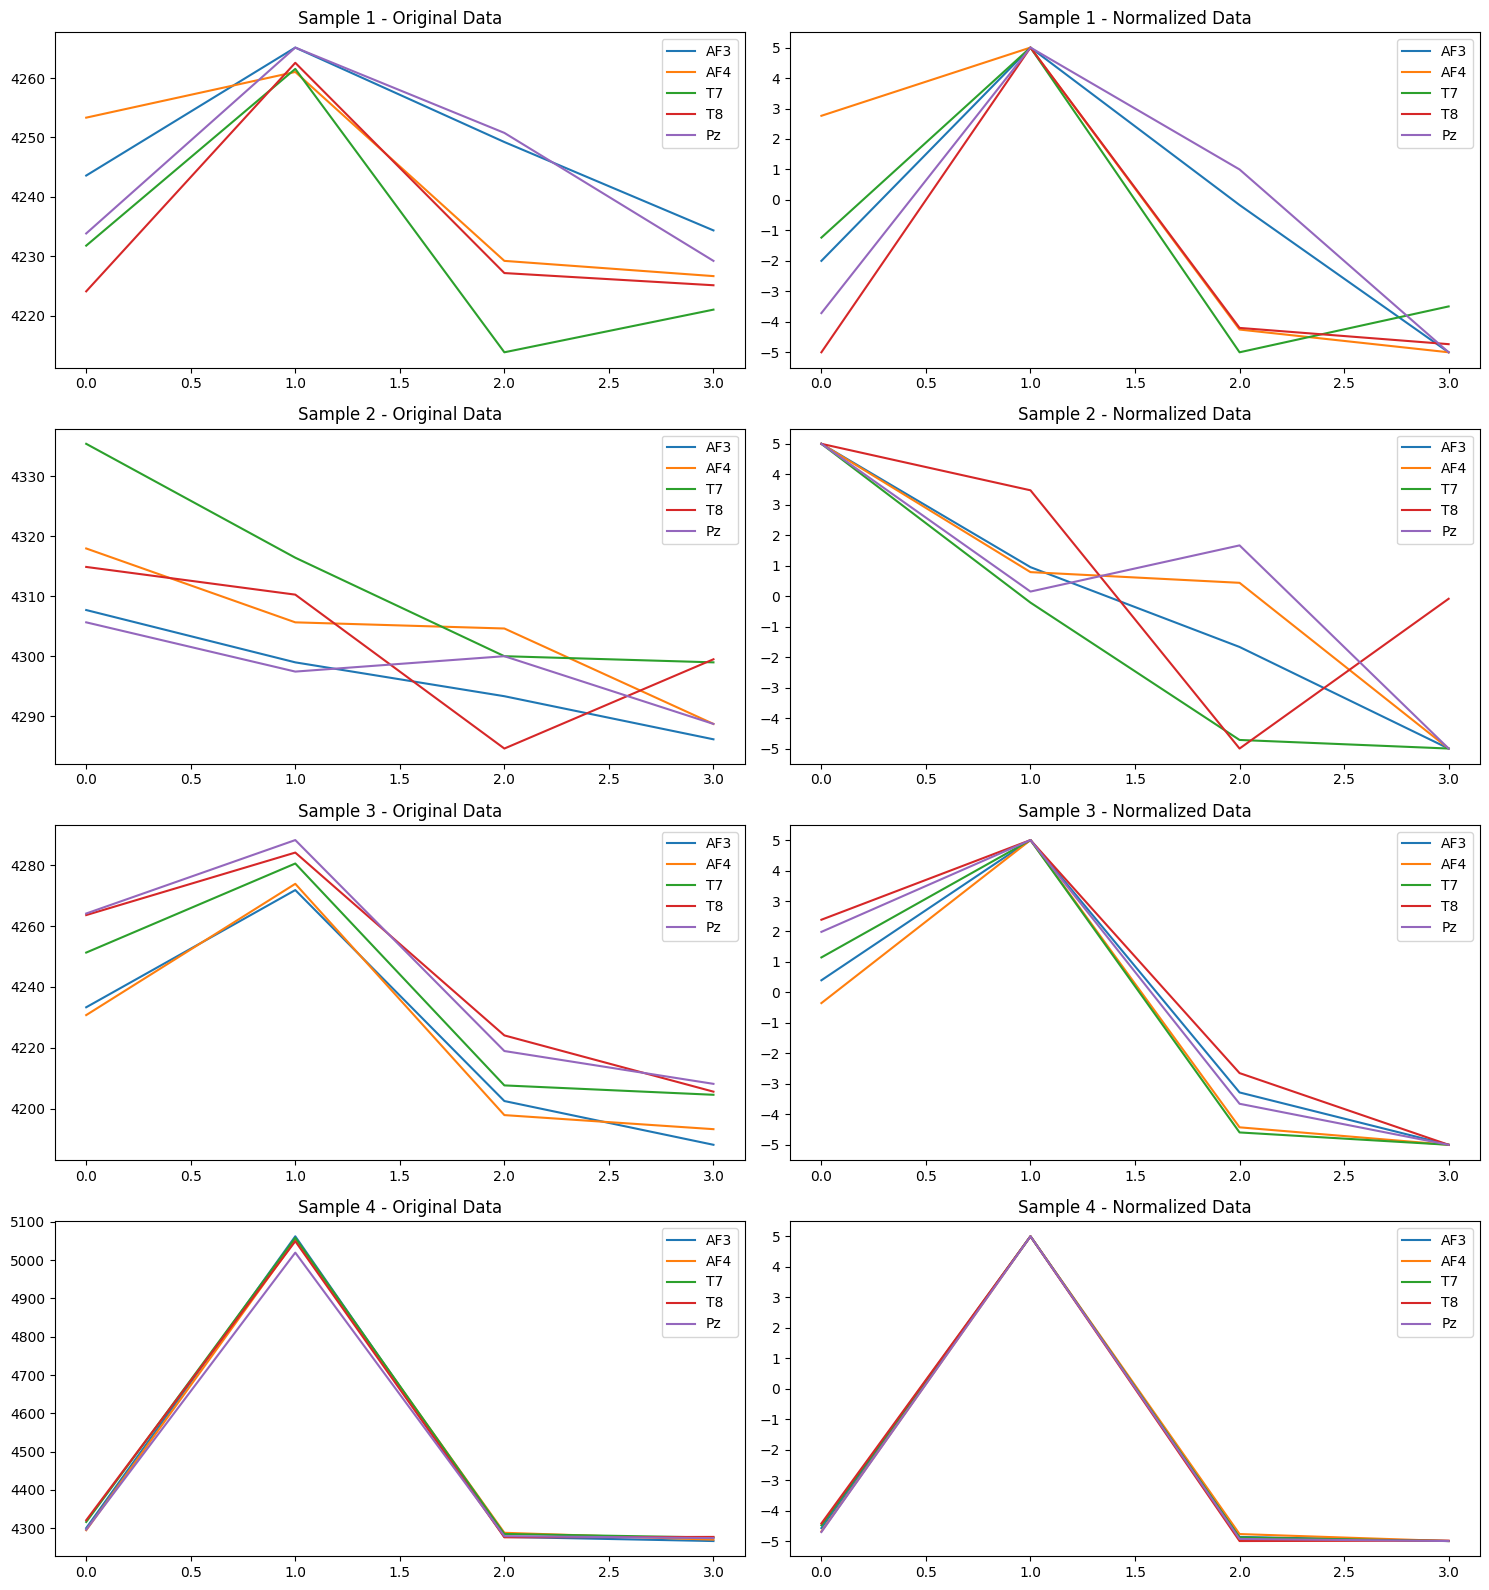

In [5]:
# Question 3: Implement a normalization function which can normalize given data in range [-x, x ].
# Normalize and plot 4 randomly selected EEG signals.

# Answer:
import os
import pandas as pd
import numpy as np

# Here we generate Normalization function (Min-Max Normalization).
def minMaxNormalization(actualData, xtoy):
    x, y = xtoy  # x = x and y = y { (-5, 5) -> x = -5 and y = 5 }
    
    # Convert actualData to same data types numeric float
    actualData = [float(value) for value in actualData]
    # Assuming Xmin and Xmax are defined elsewhere in your code and are numerical
    Xmin = np.min(actualData)
    Xmax = np.max(actualData)
    
    # Normalize data
    normalizedData = x + (y - x) * ((actualData - Xmin) / (Xmax - Xmin))
    return normalizedData

def selectRandomEEG(csvPath, sampleSize):
    listDir = os.listdir(csvPath)
    # Select random
    rnad = RandomNumberGenerator()
    randIndices = rnad.liConGen(rnad.seed, sampleSize)
    randIndices = [index % len(listDir) for index in randIndices]
    print(randIndices)
    
    chosenData = [listDir[inx] for inx in randIndices]
    print(chosenData)
    return chosenData

# Define datsets load fuunction
def loadEEGData(chosenData):
    eegData = []
    
    for i in chosenData:
        data = pd.read_csv(os.path.join(csvPath, i))
        ftData = data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
        eedData = []
        for col in ftData.columns:
            eedData.append(ftData[col].values)
        eegData.append(eedData)
        # print(eedData)
        
    normalizeChosenData = []
    for eeg in eegData:
        eedNorm = []
        for eed in eeg:
            eedNorm.append(minMaxNormalization(eed, (-5, 5)))
        normalizeChosenData.append(eedNorm)
            
    return eegData, normalizeChosenData 


# Here we seleting any 4 sample for plotting with normalize data.
csvPath = "Datasets\\MLA1_DATA\\CSV"
chosenData = selectRandomEEG(csvPath=csvPath, sampleSize=4)
eeg, norms = loadEEGData(chosenData=chosenData)

num_samples = len(eeg)
fig, axes = plt.subplots(num_samples, 2, figsize=(15, 4 * num_samples))
for i in range(num_samples):
    axes[i, 0].plot(eeg[i][0], label='AF3')
    axes[i, 0].plot(eeg[i][1], label='AF4')
    axes[i, 0].plot(eeg[i][2], label='T7')  
    axes[i, 0].plot(eeg[i][3], label='T8')
    axes[i, 0].plot(eeg[i][4], label='Pz')
    axes[i, 0].set_title(f'Sample {i+1} - Original Data')
    axes[i, 0].legend()
    
    axes[i, 1].plot(norms[i][0], label='AF3')
    axes[i, 1].plot(norms[i][1], label='AF4')
    axes[i, 1].plot(norms[i][2], label='T7')
    axes[i, 1].plot(norms[i][3], label='T8')
    axes[i, 1].plot(norms[i][4], label='Pz')
    axes[i, 1].set_title(f'Sample {i+1} - Normalized Data')
    axes[i, 1].legend()
    axes[i, 1].set_yticks(np.arange(-5, 5.1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Question 4: Use selected EEG signal from previous question and perform on:
# • Image Data:
# (a) Reshape image to (3,224,224).
# (b) Convert to Black&White.
# (c) Plot histogram of the image (Color & BW).
# (d) Calculate CenterOfMass for all images.

# Answer: 
# Here we have to use previous selected data and create identifier
# by using chosenData we fetch corresponding image file and audio files
import re
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

imgAuPath = 'Datasets\\MLA1_DATA\\ImageAudio'
prefixFile = [re.search(r'n\d+', file).group() for file in chosenData]
prefixFolds = [os.path.join(imgAuPath, i) for i in prefixFile]
# prefixFolds
shape = (3, 224, 224)
def reshapeImage(imgFolPath, shape):
    img = Image.open(imgFolPath)
    img = img.convert('RGB').resize((shape[1], shape[2]), resample=Image.Resampling.BILINEAR)
    return np.array(img).astype(np.float32)

def conBlackWhite(imgFolPath):
    img = Image.open(imgFolPath)
    img = img.convert('L')
    return np.array(img).astype(np.float32)

resizeImages = []
blackWhite = []
for i in prefixFolds:
    clrImg = []
    bawImg = []
    for j in os.listdir(i):
        clrImg.append(reshapeImage(os.path.join(i,j), shape))
        bawImg.append(conBlackWhite(os.path.join(i,j)))
        # print(bawImg)
    
    resizeImages.append(clrImg)
    blackWhite.append(bawImg)


def showHistogram(images, bw_images):
    imgs = int(len(images)/5) # show only four images
    cols = 4
    rows = (imgs + cols - 1) // cols

    plt.figure(figsize=(15, 5 * rows))

    for idx in range(imgs):
        color_img = images[idx]
        bw_img = bw_images[idx]

        plt.subplot(rows * 2, cols, idx + 1)
        plt.hist(color_img[..., 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
        plt.hist(color_img[..., 1].ravel(), bins=256, color='green', alpha=0.5, label='Green')
        plt.hist(color_img[..., 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
        plt.title(f'Color Image {idx}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.legend()

        # Plot black and white image histogram
        plt.subplot(rows * 2, cols, imgs + idx + 1)
        plt.hist(bw_img.ravel(), bins=256, color='black')
        plt.title(f'BW Image {idx}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot histograms for all images in each folder
for folder_idx, (clr_imgs, bw_imgs) in enumerate(zip(resizeImages, blackWhite)):
    showHistogram(clr_imgs, bw_imgs)

def calcCenterOfMass (imgArray):
    # with Image.open(imgPath) as img:
    #     gsImag = img.convert('L')
    #     imgArray = np.array(gsImag)
    # print()
    # print(imgArray)
    # print()
    rows, cols = imgArray.shape
    xPln = np.arange(cols)
    yPln = np.arange(rows)
    # print(xPln, yPln)
    
    mass = np.sum(imgArray)
    
    xCOM = np.sum(xPln * np.sum(imgArray, axis=0))/mass
    yCOM = np.sum(yPln * np.sum(imgArray, axis=1))/mass
    
    return (float(xCOM), float(yCOM))

centOfMass = []
# print(blackWhite[0][0])
for img in blackWhite:
    count = 0 # we calculate only five images per files
    com = []
    for imgArr in img:
        # print(imgArr)
        if count == 5:
            break
        com.append(calcCenterOfMass(imgArray=imgArr))
        count+=1
    centOfMass.append(com)

print("Center of Mass: ")
print(centOfMass)
print()
# • Audio Data:
# (a) Resample audio to 16000.
# (b) Convert to MelSpectrogram.
# (c) Plot time-domain & frequency-domain signal.
# (d) Calculate ZeroCrossingRate for all time-domain signals.

# Answer:
import librosa
auPaths = [os.path.join(imgAuPath, f'{i}.wav') for i in prefixFile]
print(auPaths)
mSpectrogram = []
for path in auPaths:
    # a)
    audio, sr = librosa.load(path, sr=16000) # Here we set sample rate to 16000
    # b)
    melSpectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=20348, hop_length=512, n_mels=128)
    melSpectrogramDB = librosa.power_to_db(melSpectrogram, ref=np.max)
    mSpectrogram.append(melSpectrogram)
    
    plt.figure(figsize=(14, 8))
     
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title('Time-Domain Signal (Waveform)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    plt.subplot(2, 1, 2)
    librosa.display.specshow(melSpectrogramDB, sr=sr, hop_length=512, x_axis='time', y_axis='mel', cmap='viridis')
    plt.title('Frequency-Domain Signal (Mel Spectrogram)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(format='%+2.0f dB')
    
    plt.tight_layout()
    plt.show()
    
plt.tight_layout()
plt.show()

# d)
zeroCroRate = []
def zeorCrossingRate(audio):
    changeSign = 0
    
    for i in range(1, len(audio)):
        if (audio[i-1] * audio[i]) < 0:
            changeSign+=1
            
    return changeSign/len(audio)

for path in auPaths:
    audio, sr = librosa.load(path, sr=16000)
    zeroCroRate.append(zeorCrossingRate(audio=audio))

print("Zero Crossing Rate:")
print(zeroCroRate)

In [ ]:
# Question 5: Calculate and plot PowerSpectralDensity (PSD) of randomly selected 4 EEG signals.

# Answer:


#### **Intermediate**
- Auto-Correlation
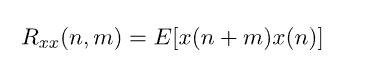

- Cross-Correlation
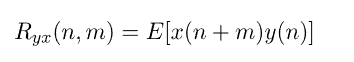

['MLA1_DATA\\CSV\\MindBigData_Imagenet_Insight_n00007846_135201_1_5.csv', 'MLA1_DATA\\CSV\\MindBigData_Imagenet_Insight_n00141669_2127_1_300.csv', 'MLA1_DATA\\CSV\\MindBigData_Imagenet_Insight_n01496331_4845_1_1607.csv', 'MLA1_DATA\\CSV\\MindBigData_Imagenet_Insight_n01495701_10784_1_155.csv']
[           1            2            3            4            5    \
0  4264.615385  4256.923077  4248.205128  4245.128205  4251.282051   
1  4243.589744  4253.333333  4231.794872  4224.102564  4233.846154   
2  4265.128205  4261.025641  4261.538462  4262.564103  4265.128205   
3  4249.230769  4229.230769  4213.846154  4227.179487  4250.769231   
4  4234.358974  4226.666667  4221.025641  4225.128205  4229.230769   

           6            7            8            9            10   ...  \
0  4250.256410  4246.666667  4252.820513  4253.333333  4256.923077  ...   
1  4233.846154  4232.307692  4237.948718  4233.333333  4234.358974  ...   
2  4265.128205  4259.487179  4257.435897  4262.564103  426

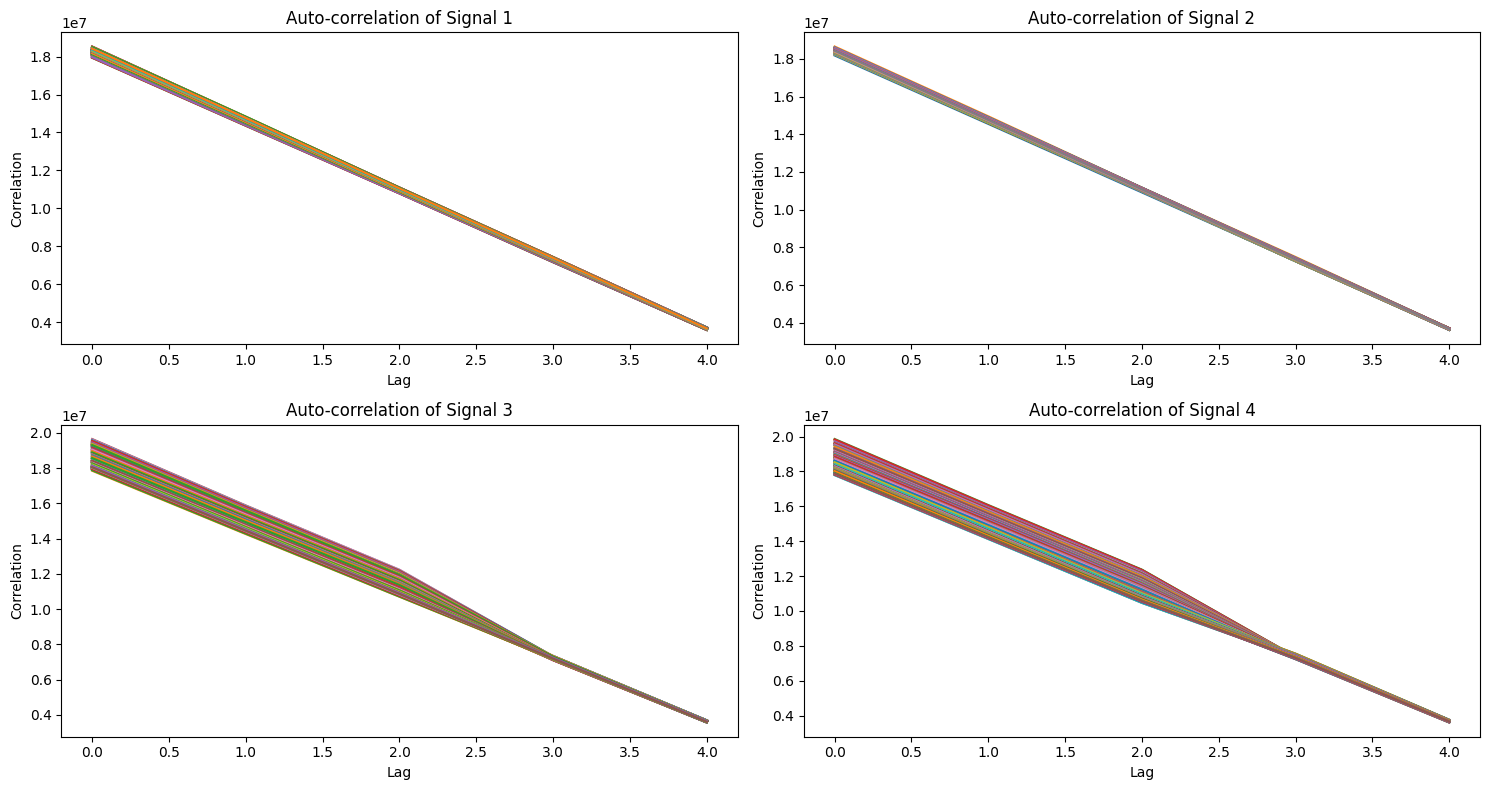

Auto Correlation: 
[array([[18074414.99013806, 18023936.41025642, 17937920.31558184, ...,
        18365546.8244576 , 18412204.49704143, 18418316.73898751],
       [14462602.97172912, 14425216.93622616, 14351141.88034187, ...,
        14704371.07166338, 14740855.75279422, 14755303.66863905],
       [10856241.47271531, 10827424.32610125, 10784817.04142011, ...,
        11007344.90466798, 11037674.42472058, 11042561.7357002 ],
       [ 7218043.4451019 ,  7196186.45627877,  7152759.50032873, ...,
         7357510.32215648,  7373870.24326102,  7375155.55555556],
       [ 3611582.48520709,  3598518.97435898,  3586356.55489809, ...,
         3660402.36686391,  3670449.23076923,  3662176.98882314]]), array([[18438950.84812624, 18512155.16107825, 18590870.16436557, ...,
        18431926.20644315, 18400299.01380673, 18425235.02958579],
       [14766414.30637738, 14827282.36686391, 14886991.08481264, ...,
        14764210.38790272, 14732929.91452993, 14750925.33859303],
       [11067534.30637738,

In [17]:
# Question 1: Calculate and plot Cross-Correlation and Auto-Correlation of randomly selected 4 EEG signals.

# Answer:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def adLen(audioOne, audioTwo):
    audLenOne = len(audioOne)
    audLenTwo = len(audioTwo)
    if audLenOne > audLenTwo:
        audioTwo = np.pad(audioTwo, (0, audLenOne - audLenTwo), 'constant')
    elif audLenTwo > audLenOne:
        audioOne = np.pad(audioOne, (0, audLenTwo - audLenOne), 'constant')
    return audioOne, audioTwo

# def autoCorrelation(audio):
#     lenAudio = len(audio)
#     corr = np.zeros(lenAudio)
#     for m in range(lenAudio):
#         for i in range(lenAudio - m):
#             corr[m] += audio[i] * audio[i + m]
#     corr /= lenAudio
#     return corr

# def crossCorrelation(audioOne, audioTwo):
#     audioOne, audioTwo = adLen(audioOne, audioTwo)
#     lenAudio = len(audioOne)
#     corr = np.zeros(lenAudio)
#     for m in range(lenAudio):
#         for i in range(lenAudio - m):
#             corr[m] += audioOne[i] * audioTwo[i + m]
#     corr /= lenAudio
#     return corr

def autoCorrelation(audio):
    audio = audio.values  # Convert DataFrame to numpy array
    num_cols = audio.shape[1]
    corr = np.zeros((audio.shape[0], num_cols))
    for col in range(num_cols):
        for m in range(audio.shape[0]):
            for i in range(audio.shape[0] - m):
                corr[m, col] += audio[i, col] * audio[i + m, col]
        corr[:, col] /= audio.shape[0]
    return corr

# def crossCorrelation(audioOne, audioTwo):
#     audioOne, audioTwo = adLen(audioOne.values, audioTwo.values)  # Convert DataFrames to numpy arrays
#     num_cols = audioOne.shape[1]
#     corr = np.zeros((audioOne.shape[0], num_cols))
#     for col in range(num_cols):
#         for m in range(audioOne.shape[0]):
#             for i in range(audioOne.shape[0] - m):
#                 if i + m < audioTwo.shape[0]:  # Check if i + m is within bounds
#                     corr[m, col] += audioOne[i, col] * audioTwo[i + m, col]
#         corr[:, col] /= audioOne.shape[0]
#     return corr

eeg_signals = []
# print(chosenData)
csvPaths = [os.path.join('Datasets\\MLA1_DATA\\CSV', i) for i in chosenData]
print(csvPaths)
for path in csvPaths:
    data = pd.read_csv(path, header=None)
    eeg_signals.append(data.iloc[:, 1:])  # assuming the signal data is in a column named 'signal'

print(eeg_signals)
autoCorr = []
crosCorr = []
for signal in eeg_signals:
    autoCorr.append(autoCorrelation(signal))

# for i in range(len(eeg_signals)):
#     crsCr = []
#     for j in range(i+1, len(eeg_signals)):
#         crsCr.append(crossCorrelation(eeg_signals[i], eeg_signals[j]))
#     crosCorr.append(crsCr)

plt.figure(figsize=(15, 8))
for i, ac in enumerate(autoCorr):
    plt.subplot(2, 2, i + 1)
    plt.plot(ac)
    plt.title(f'Auto-correlation of Signal {i + 1}')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
plt.tight_layout()
plt.show()

# plt.figure(figsize=(15, 8))
# plot_index = 1
# for i in range(len(crosCorr)):
#     for j in range(len(crosCorr[i])):
#         plt.subplot(2, 3, plot_index)
#         plt.plot(crosCorr[i][j])
#         plt.title(f'Cross-correlation Signal {i + 1} & {i + j + 2}')
#         plt.xlabel('Lag')
#         plt.ylabel('Correlation')
#         plot_index += 1
# plt.tight_layout()
# plt.show()

# print("Auto Correlation: ")
# print(autoCorr)
    
# print("Cross Correlation: ")
# print(crosCorr)

In [ ]:
# Question 2: Perform exploratory data analysis (EDA). (Visualization, statistical analysis, class imbalance, features visualization, outliers detection etc.)
# (a) Image data.
# (b) Audio data.

# Answer: 
# (a) Image data.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

imgPaths = [os.path.join(imgAuPath, i) for i in os.listdir(imgAuPath) if os.path.isdir(os.path.join(imgAuPath, i))]
rnad = RandomNumberGenerator()
randIndices = rnad.liConGen(rnad.seed, 4)
randIndices = [index % len(imgPaths) for index in randIndices]
imgPaths = [imgPaths[i] for i in randIndices]
# print(imgPaths)
selectImg = [os.path.join(i, os.listdir(i)[0]) for i in imgPaths]
print(selectImg)

plt.figure(figsize=(15, 4))
for i, image_path in enumerate(selectImg):
    img = plt.imread(image_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title('Image {}'.format(i+1))
    plt.axis('off')
plt.show()

plt.figure(figsize=(15, 4))
for i, image_path in enumerate(selectImg):
    img = plt.imread(image_path)
    plt.subplot(1, 5, i+1)
    sns.histplot(img.ravel(), kde=False)
    plt.title('Image {}'.format(i+1))
plt.show()

imgArrays = [plt.imread(i) for i in selectImg]
meanPixVal = [float(np.mean(img)) for img in imgArrays]
stdPixVal = [float(np.std(img)) for img in imgArrays]
print('Mean Pixel Values:', meanPixVal)
print('Standard Deviation of Pixel Values:', stdPixVal)


z_scores = [stats.zscore(img) for img in imgArrays]
outliers = [img for img, z_score in zip(imgArrays, z_scores) if np.abs(z_score).max() > 3]

print('Outlier Images:', outliers)